<a href="https://colab.research.google.com/github/ydv1412/comapny_clustering/blob/main/company_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import string
import re
from tqdm import tqdm
from bs4 import BeautifulSoup
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,confusion_matrix
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

In [2]:
import nltk                                                                               ### importing nltk for text preprocessing
nltk.download('stopwords')   

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/capstone project /capstone 4/company_Description.csv')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73974 entries, 0 to 73973
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        73974 non-null  int64 
 1   meta_keywords     23672 non-null  object
 2   meta_description  66886 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
df.head()

,Unnamed: 0,meta_keywords,meta_description
0,0,"electricians vero beach, vero beach electrical...","Providing quality, reliable full service resid..."
1,1,Elias Medical bakersfield ca family doctor med...,For the best value in Bakersfield skin care tr...
2,2,"Koops Overhead Doors, Albany Garage Doors, Tro...","Koops Overhead Doors specializes in the sales,..."
3,3,NaN,We would like to welcome you to Midtown Eyecar...
4,4,NaN,Repro Security provide a range of tailor made ...


In [ ]:
stop_words = stopwords.words('english')   

In [ ]:
def denocrate(phase):                                                                                               #### function for replacing "'t","\ll" etc with not ,will
    phase = re.sub(r"\'t"," not ",phase)
    phase = re.sub(r"\'ll", " will ",phase)
    phase = re.sub(r"\'re" , " are " , phase)
    phase = re.sub(r"\'d" , " would " , phase)
    phase = re.sub(r"\'m" , " am " , phase)
    phase = re.sub(r"\'ve" , " have " , phase)
    phase = re.sub(r"\'s" , " is " , phase)
    return phase

# def denocrate(phases):
#     phase = re.sub(r"\'t"," not ",phase)
#     phase = re.sub(r"\'ll", " will ",phase)
#     phase = re.sub(r"\'re" , " are " , phase)
#     phase = re.sub(r"\'d" , " would " , phase)
#     phase = re.sub(r"\'m" , " am " , phase)
#     phase = re.sub(r"\'ve" , " have " , phase)
#     phase = re.sub(r"\'s" , " is " , phase)
#   return texts

In [ ]:
def clean_text(corpus):
  texts = []
  for text in tqdm(corpus):
    soup = BeautifulSoup(text , "lxml")                                                                              ###### removing html tags
    text = soup.get_text()
    text = re.sub(r"http\S+", "", text)                                                                              #### removing links 
    text = denocrate(text)
    text = re.sub("\S*\d\S*", "", str(text)).strip()                                                                      #### removing words which have deciml numbers
    text = re.sub('[^A-Za-z]+', " ", text).strip()                                                                   ####  removing special characters
    text = text.lower()
    text = ' '.join(word.lower() for word in text.split() if word.lower() not in stop_words)                          
    text = ' '.join(word for word in text.split() if len(word)>2)
    texts.append(text)
  return texts

In [ ]:
df2 = pd.DataFrame()

In [ ]:
df2 = df.copy()

In [ ]:
df2['meta_keywords'] = df2['meta_keywords'].fillna('')
df2['meta_description'] = df2['meta_description'].fillna('')

In [ ]:
df2.head()

,Unnamed: 0,meta_keywords,meta_description
0,0,"electricians vero beach, vero beach electrical...","Providing quality, reliable full service resid..."
1,1,Elias Medical bakersfield ca family doctor med...,For the best value in Bakersfield skin care tr...
2,2,"Koops Overhead Doors, Albany Garage Doors, Tro...","Koops Overhead Doors specializes in the sales,..."
3,3,,We would like to welcome you to Midtown Eyecar...
4,4,,Repro Security provide a range of tailor made ...


In [ ]:
# df2['meta_description'] = df['meta_description'].apply(str)

In [ ]:
# df2['meta_keywords'] = df['meta_keywords'].apply(str)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73974 entries, 0 to 73973
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        73974 non-null  int64 
 1   meta_keywords     73974 non-null  object
 2   meta_description  73974 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
df2['meta_description'] = clean_text(df2['meta_description'] )
df2['meta_keywords'] = clean_text(df2['meta_keywords'] )

 16%|█▋        | 12135/73974 [00:04<00:24, 2551.22it/s]/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "https://gradnation.americaspromise.org/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
 66%|██████▋   | 49143/73974 [00:20<00:09, 2519.02it/s]/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "https://vimeo.com/getoutevents/review/382139674/4e7aff95fe" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
 77%|███████▋  | 56820/73974 [00:23<00:06, 2512.36it/s]/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "http://www.mitservices.net/"

In [ ]:
df2.to_csv('/content/drive/MyDrive/capstone project /capstone 4/cleaned_description.csv')

In [ ]:
# df2['meta_description'] = denocrate(df2['meta_description'] )
# df2['meta_keywords'] = denocrate(df2['meta_keywords'] )

In [ ]:
# df2['meta_description'] = df['meta_description'].apply(str)
# df2['meta_keywords'] = df['meta_keywords'].apply(str)

In [ ]:
# df2['meta_description'] = clean_text(df2['meta_description'])
# df2['meta_keywords'] = clean_text(df2['meta_keywords'] )

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73974 entries, 0 to 73973
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        73974 non-null  int64 
 1   meta_keywords     73974 non-null  object
 2   meta_description  73974 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
df2['meta_keywords'][:]

0         
1         
2         
3         
4         
        ..
73969     
73970     
73971     
73972     
73973     
Name: meta_keywords, Length: 73974, dtype: object

In [ ]:
df2.head(10)

,Unnamed: 0,meta_keywords,meta_description
0,0,electricians vero beach vero beach electrical ...,providing quality reliable full service reside...
1,1,elias medical bakersfield family doctor medici...,best value bakersfield skin care treatment med...
2,2,koops overhead doors albany garage doors troy ...,koops overhead doors specializes sales service...
3,3,,would like welcome midtown eyecare professiona...
4,4,,repro security provide range tailor made secur...
5,5,wood green timber,wood green london timber timber merchants wood...
6,6,chemicals drilling fluids eco friendly environ...,oilfield chemicals production completion pipel...
7,7,,
8,8,high efficiency boiler plumbing professionals ...,plumbing heating ductless air conditioning rad...
9,9,certified brake metal break metal fabrication ...,metal pride inc square foot sheet metal fabric...


In [ ]:
df2['meta_keywords'][0]

'electricians vero beach vero beach electrical contractors electric contractor electrical contractor lighting control lighting solutions florida electrical business lighting electrical contract vero beach electric commercial lighting control electrician indian river county sebastian pierce'

In [ ]:
vectorizer = CountVectorizer(max_df = 0.,min_df = 1000)                                     ### using bag of words to vectorizing processed_reviews
X = vectorizer.fit_transform(df2['meta_description'])

In [ ]:
X.shape

(73974, 153)

In [ ]:
vectorizer.get_feature_names()     

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['across',
 'affordable',
 'agency',
 'also',
 'area',
 'areas',
 'available',
 'award',
 'based',
 'best',
 'business',
 'businesses',
 'call',
 'care',
 'center',
 'city',
 'clients',
 'com',
 'commercial',
 'community',
 'companies',
 'company',
 'construction',
 'consulting',
 'contact',
 'corporate',
 'custom',
 'customer',
 'customers',
 'dedicated',
 'design',
 'development',
 'digital',
 'education',
 'electrical',
 'energy',
 'equipment',
 'estate',
 'every',
 'experience',
 'experienced',
 'experts',
 'family',
 'financial',
 'find',
 'firm',
 'first',
 'food',
 'free',
 'full',
 'gas',
 'get',
 'global',
 'great',
 'group',
 'health',
 'healthcare',
 'help',
 'high',
 'home',
 'hospital',
 'hotel',
 'inc',
 'including',
 'independent',
 'india',
 'industrial',
 'industries',
 'industry',
 'information',
 'innovative',
 'insurance',
 'international',
 'investment',
 'law',
 'leading',
 'learn',
 'legal',
 'life',
 'local',
 'located',
 'logistics',
 'looking',
 'make',
 'mana

In [ ]:
bag_of_words = vectorizer.transform(df2['meta_description']).toarray()     

In [ ]:
bag_of_words.shape

(73974, 153)

In [ ]:
vectorizer = CountVectorizer(max_df = 0.9,min_df = 500)                                     ### using bag of words to vectorizing processed_reviews
Y = vectorizer.fit_transform(df2['meta_keywords'])

In [ ]:
Y.shape

(73974, 68)

In [ ]:
bag_of_words2 = vectorizer.transform(df2['meta_keywords']).toarray()  

In [ ]:
bag_of_words2.shape

(73974, 68)

In [ ]:
bag_of_words

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [ ]:
df3 = pd.DataFrame(bag_of_words)
df4 = pd.DataFrame(bag_of_words2)

In [ ]:
type(df3)

pandas.core.frame.DataFrame

In [ ]:
type(df4)

pandas.core.frame.DataFrame

In [ ]:
result = pd.concat([df3, df4], axis=1, join='inner')

In [ ]:
result.shape

(73974, 221)

In [ ]:
result.to_csv('/content/drive/MyDrive/capstone project /capstone 4/company_Description2.csv')

In [4]:
df = pd.read_csv('/content/drive/MyDrive/capstone project /capstone 4/company_Description2.csv')

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE()

In [ ]:
x = tsne.fit_transform(df)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


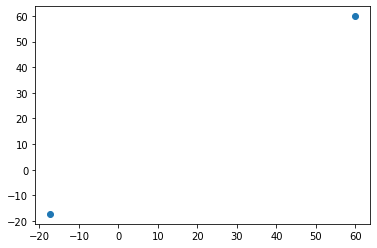

In [ ]:
plt.scatter(x[0],x[1])


3

You are asking the right question. And you can use kmeans!!! Despite what you may be told by some, you absolutely can cluster with kmeans. There is nothing about binary data that will cause kmeans to fail. However, you might want to consider the following:

1 - Zero-mean your matrix by column. This means that you compute the mean row vector, which now becomes a real valued vector, and then subtract that vector from each of the original binary vectors. Your 0/1 binary matrix of 650K row vectors now becomes a real valued matrix of 650K vectors. Note that this DOES NOT change the mutual distance (or similarity) between vectors. It is just a translation operation, applied identically to each vector.

2 - Apply the sign function to the matrix. The sign function forces each matrix element to -1 if it is negative, or to +1 otherwise. The result of this transformation, in steps 1 and 2, is that the new matrix is no longer sparse.

3 - Now apply kmeans. you can use the Euclidean metric, or experiment with other metrics that you kmeans implementation supports. No need to use a specific binary clustering algorithm. kmeans is simple and clustering 650K vectors should be easily feasible on a decent desktop.

4 - If you wish to have binary cluster vectors as the result, then apply the sign function to the final k clusters. You may also convert the final cluster vectors from +1/-1 representation to 0/1 representation (but only after applying the sign function).

Things to note:

Because you only have 62 dimensional vectors the range of 'similarity' values that are possible between vectors in the binary representation is 62 (corresponding to a Hamming distance between 0 and 62.) Since the range of distances between binary vectors is thus limited, any ranking by hamming distances will necessarily result in numerous ties. As you try to squeeze 650K vectors into only 62 possible distance buckets, the number of vectors per bucket will depend on the number of clusters, but will generally be large and you may need to resolve ties by going back to the original data from which you derived the initial binary matrix.


In [ ]:
x.shape

(73974, 2)

In [4]:
from sklearn.cluster import KMeans

In [ ]:
df.head()

NameError: ignored

In [ ]:
numpy_df = df.to_numpy

NameError: ignored

In [5]:
from sklearn.metrics import silhouette_score

In [ ]:
sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(df)
  labels = kmeans.labels_
  sil.append(silhouette_score(df, labels, metric = 'euclidean'))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


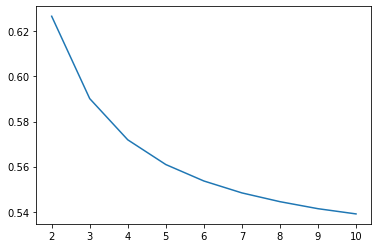

In [ ]:
import seaborn as sns
xs = [i for i in range(2,11)]
sns.lineplot(xs,sil)

In [ ]:
sil2 = []
kmax = 20
for k in range(11, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(df)
  labels = kmeans.labels_
  sil.append(silhouette_score(df, labels, metric = 'euclidean'))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


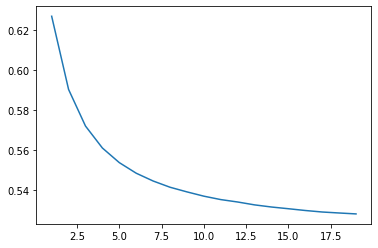

In [ ]:
xs2 = [i for i in range(1,20)]
sns.lineplot(xs2,sil)

at k = 8 the error is minimum

In [ ]:
#lets try description only


In [6]:
df = pd.read_csv('/content/drive/MyDrive/capstone project /capstone 4/cleaned_description.csv')

### tokenizer and pad_sequence

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer(num_words = 5000) 
# tokenizer.fit_on_texts(df['meta_description'])

In [ ]:
tokenizer.fit_on_texts(df['meta_description'].apply(str))

In [ ]:
word_index = tokenizer.word_index

In [ ]:
word_index

{'services': 1,
 'service': 2,
 'business': 3,
 'solutions': 4,
 'nan': 5,
 'company': 6,
 'sep': 7,
 'insurance': 8,
 'management': 9,
 'new': 10,
 'best': 11,
 'quality': 12,
 'design': 13,
 'energy': 14,
 'based': 15,
 'home': 16,
 'today': 17,
 'marketing': 18,
 'commercial': 19,
 'provides': 20,
 'providing': 21,
 'care': 22,
 'call': 23,
 'products': 24,
 'provide': 25,
 'law': 26,
 'leading': 27,
 'help': 28,
 'free': 29,
 'firm': 30,
 'years': 31,
 'one': 32,
 'full': 33,
 'sale': 34,
 'medical': 35,
 'clients': 36,
 'needs': 37,
 'offers': 38,
 'development': 39,
 'financial': 40,
 'experience': 41,
 'industry': 42,
 'offer': 43,
 'solar': 44,
 'high': 45,
 'agency': 46,
 'industrial': 47,
 'software': 48,
 'family': 49,
 'property': 50,
 'consulting': 51,
 'get': 52,
 'professional': 53,
 'online': 54,
 'located': 55,
 'food': 56,
 'since': 57,
 'web': 58,
 'serving': 59,
 'equipment': 60,
 'systems': 61,
 'estate': 62,
 'support': 63,
 'real': 64,
 'technology': 65,
 'group'

In [ ]:
sequences = tokenizer.texts_to_sequences(df['meta_description'].apply(str))

In [ ]:
padded_sequences = pad_sequences(sequences, maxlen = 300 , truncating='post')

In [ ]:
len(padded_sequences)

73974

In [ ]:
len(padded_sequences[50])

300

In [ ]:
sil = []
kmax = 20

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(padded_sequences)
  labels = kmeans.labels_
  sil.append(silhouette_score(padded_sequences, labels, metric = 'euclidean'))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


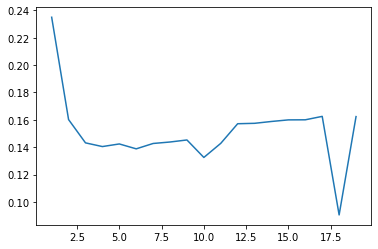

In [ ]:
xs2 = [i for i in range(1,20)]
sns.lineplot(xs2,sil)

In [8]:
import gensim

In [9]:
from gensim.models import word2vec
from gensim.models import KeyedVectors

In [10]:
i = 0
filtered_list = []
for sent in df['meta_description'].apply(str):
    filtered_data = []
    # sent = removehtml(sent)
    for word in sent.split():
        for words in word.split():
            if(words.isalpha()):
                filtered_data.append(words)
            else:
                continue
                
    filtered_list.append(filtered_data)

In [11]:
len(filtered_list[0])

15

In [11]:
filtered_list[0]

['providing',
 'quality',
 'reliable',
 'full',
 'service',
 'residential',
 'commercial',
 'electrical',
 'contractors',
 'service',
 'vero',
 'beach',
 'indian',
 'river',
 'county']

In [12]:
w2v = gensim.models.Word2Vec( filtered_list ,min_count = 5,size = 300)


In [ ]:
avrg_vector = []
for sent in filtered_list:
    word_vector=np.zeros(300)
    count = 0
    for words in sent:
        try:
            vec = w2v.wv[words]
            word_vector += vec
            count +=1
        except:
            pass
    word_vector /= count
    avrg_vector.append(word_vector)   


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


In [ ]:
df2 = pd.DataFrame(avrg_vector)

In [ ]:
df2.shape

(73974, 300)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73974 entries, 0 to 73973
Columns: 300 entries, 0 to 299
dtypes: float64(300)
memory usage: 169.3 MB


In [ ]:
df3 = df2.fillna(0)

In [ ]:
sil = []
kmax = 20

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(df3)
  labels = kmeans.labels_
  sil.append(silhouette_score(df3, labels, metric = 'euclidean'))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


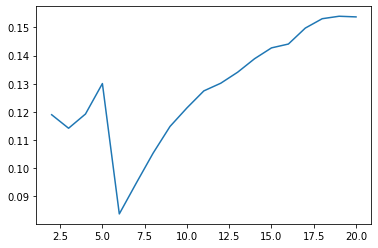

In [ ]:
xs2 = [i for i in range(2,21)]
sns.lineplot(xs2,sil)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
count_vector = TfidfVectorizer(ngram_range = (1,2))

In [14]:
df['meta_keywords'] = df['meta_keywords'].fillna('')
df['meta_description'] = df['meta_description'].fillna('')

In [15]:
tfidf_vector = count_vector.fit_transform(df['meta_description'].values)

In [16]:
features =count_vector.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
tfidf_w2v = []
row = 0
for sent in filtered_list:
    vector = np.zeros(300)
    summation = 0
    for word in sent:
        try:
            tf = tfidf_vector[row,features.index(word)]
            # print(tf)
            value = tf * w2v.wv[word]
            vector += value
            summation += tf
        except:
            pass
    vector = vector/summation
    tfidf_w2v.append(vector)
    row +=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
